## Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Save the dataset in a dataframe

In [2]:
df = pd.read_csv('googleplaystore.csv')

## Have a quick glance at the data set

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Gain some insights of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Check out the statistical data of the numeric column(s)

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## A quick check of the number of rows and columns of the dataframe

In [6]:
df.shape

(10841, 13)

## A boxplot showing the distribution of the Ratings

<AxesSubplot:>

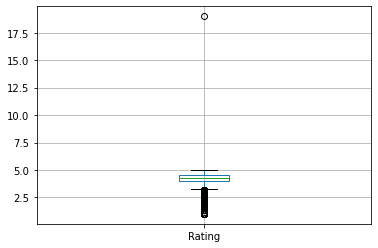

In [7]:
df.boxplot('Rating')

#### it is seen here that there is an outlying value

## Using a histogram to show the distribution of the ratings

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

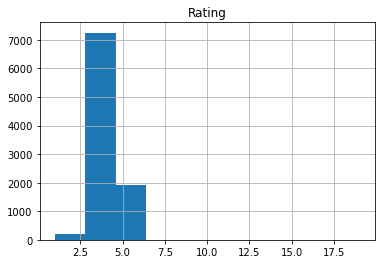

In [8]:
df.hist('Rating')

## The ratings are all expected to have values between 0 and 5, The boxplot and histogram indicate that we have an outlier. Hence we filter the dataframe in order to get the outlying values 

In [9]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## A rating of 19.0 is clearly an error. This value is possibly a typo. The value is perhaps 1.90 or something different entirely. I would go ahead and drop this row from the dataframe.
## it can also be seen here that the Category is 1.9 which obviously is an error. Since we have two columns in error, it is best to drop this row. 

In [10]:
df.drop([10472], inplace=True)

## A quick check to see if the row has indeed been removed

In [11]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


## The boxplot of the Rating after removing the outlier

<AxesSubplot:>

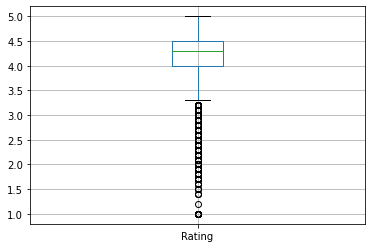

In [12]:
df.boxplot('Rating')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

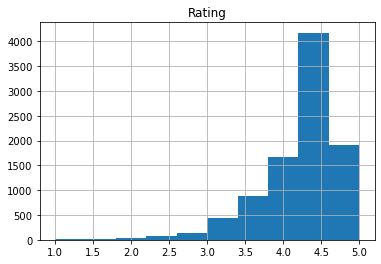

In [13]:
df.hist('Rating')

#### The above plots show that the majority of the ratings are between 4.0 and 5.0

## Checking for null values in each column

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### The Rating column has 1474 null values. We can decide to remove these or simply fill them in with an average value such as the median of the ratings

## Let us define a function which will be used to impute the median rating for the ratings with null values

In [15]:
def impute_median(series):
    return series.fillna(series.median())

In [16]:
df.Rating = df['Rating'].transform(impute_median)

## Checking for the null values again. (It is expected that the Ratings column should have no null values now)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

## Similarly, the other null values in Type, Current Ver and Android Ver must be removed/replaced too in order to have a clean data set. Since these columns contain non-numeric values, we can simply replace the null values with the mode of each column.

In [18]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [19]:
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

## Checking to confirm that all null values have been replaced 

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## The data consists of some columns which are supposed to be numeric but are in non-numeric datatypes. These data will first be cleaned the  converted to numeric datatypes so that meaningful insights can be gained from them.

In [21]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace("$", "") if "$" in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [23]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [24]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [27]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Group the data by the category column

In [28]:
grp = df.groupby('Category')
rating_by_category = grp['Rating'].agg(np.mean)
reviews_by_category = grp['Reviews'].agg(np.mean)
price_by_category = grp['Price'].agg(np.mean)

sum_of_rating_by_category = grp['Rating'].agg(np.sum)
sum_of_reviews_by_category = grp['Reviews'].agg(np.sum)
sum_of_price_by_category = grp['Price'].agg(np.sum)

## The sum of the prices in each category

In [29]:
sum_of_price_by_category

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

## Visualizing the sum of prices by category

<AxesSubplot:xlabel='Category', ylabel='total price'>

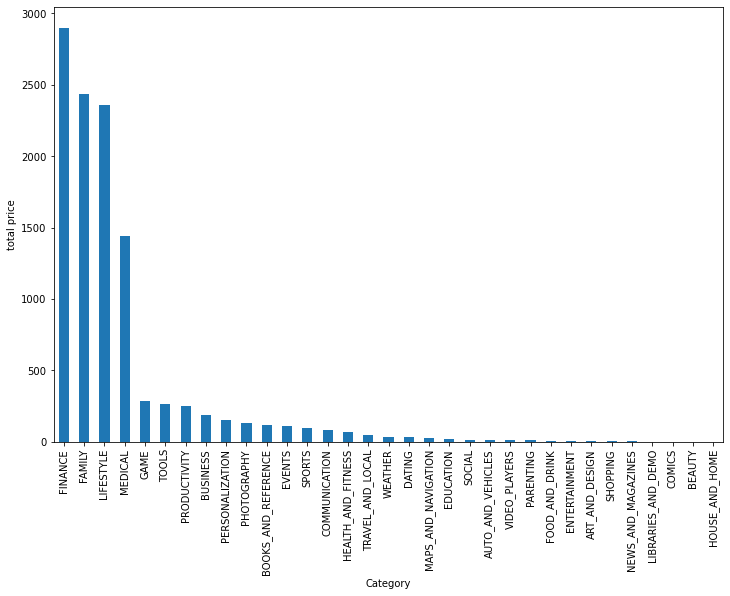

In [30]:
sum_of_price_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), ylabel='total price')

In [31]:
sum_of_rating_by_category

Category
ART_AND_DESIGN          283.1
AUTO_AND_VEHICLES       357.5
BEAUTY                  227.0
BOOKS_AND_REFERENCE    1001.5
BUSINESS               1923.9
COMICS                  249.6
COMMUNICATION          1617.7
DATING                  942.0
EDUCATION               684.6
ENTERTAINMENT           614.8
EVENTS                  281.3
FAMILY                 8291.4
FINANCE                1519.5
FOOD_AND_DRINK          531.6
GAME                   4904.2
HEALTH_AND_FITNESS     1459.5
HOUSE_AND_HOME          370.6
LIBRARIES_AND_DEMO      357.6
LIFESTYLE              1578.2
MAPS_AND_NAVIGATION     558.3
MEDICAL                1952.1
NEWS_AND_MAGAZINES     1177.8
PARENTING               258.0
PERSONALIZATION        1696.9
PHOTOGRAPHY            1406.3
PRODUCTIVITY           1792.1
SHOPPING               1108.4
SOCIAL                 1257.0
SPORTS                 1626.8
TOOLS                  3439.5
TRAVEL_AND_LOCAL       1066.3
VIDEO_PLAYERS           714.7
WEATHER                 348.4
N

## Visualizing the sum of ratings by category

<AxesSubplot:xlabel='Category', ylabel='total ratings'>

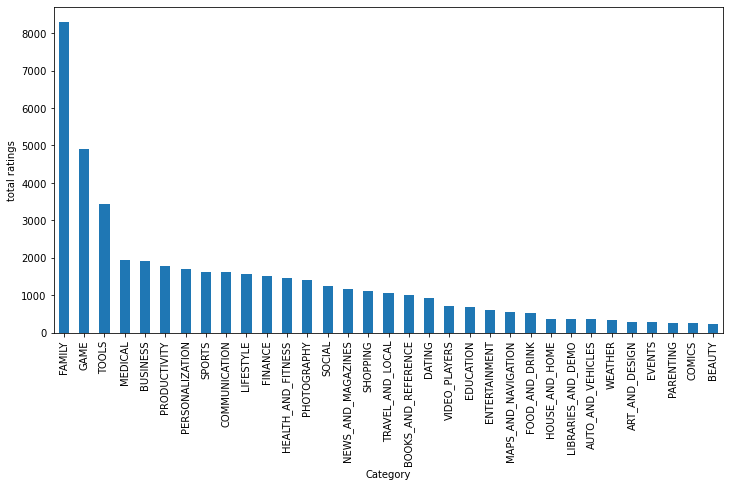

In [32]:
sum_of_rating_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ylabel='total ratings')

## The sum of reviews by category

In [33]:
sum_of_reviews_by_category

Category
ART_AND_DESIGN            1714440
AUTO_AND_VEHICLES         1163666
BEAUTY                     396240
BOOKS_AND_REFERENCE      21959069
BUSINESS                 13954552
COMICS                    3383276
COMMUNICATION           815462260
DATING                    7291278
EDUCATION                39595786
ENTERTAINMENT            59178154
EVENTS                     161018
FAMILY                  410226330
FINANCE                  17550728
FOOD_AND_DRINK            8883330
GAME                   1585422349
HEALTH_AND_FITNESS       37893743
HOUSE_AND_HOME            3976385
LIBRARIES_AND_DEMO        1037118
LIFESTYLE                12882784
MAPS_AND_NAVIGATION      30659254
MEDICAL                   1585975
NEWS_AND_MAGAZINES       54400863
PARENTING                  958331
PERSONALIZATION          89346140
PHOTOGRAPHY             213516650
PRODUCTIVITY            114116975
SHOPPING                115041222
SOCIAL                  621241422
SPORTS                   70830169
TOOLS

## Visualizing the sum of reviews per category

C:\Users\PC\AppData\Local\Temp/ipykernel_9604/3122493562.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


[Text(0, 0.0, '0'),
 Text(0, 200000000.0, '200,000,000'),
 Text(0, 400000000.0, '400,000,000'),
 Text(0, 600000000.0, '600,000,000'),
 Text(0, 800000000.0, '800,000,000'),
 Text(0, 1000000000.0, '1,000,000,000'),
 Text(0, 1200000000.0, '1,200,000,000'),
 Text(0, 1400000000.0, '1,400,000,000'),
 Text(0, 1600000000.0, '1,600,000,000'),
 Text(0, 1800000000.0, '1,800,000,000')]

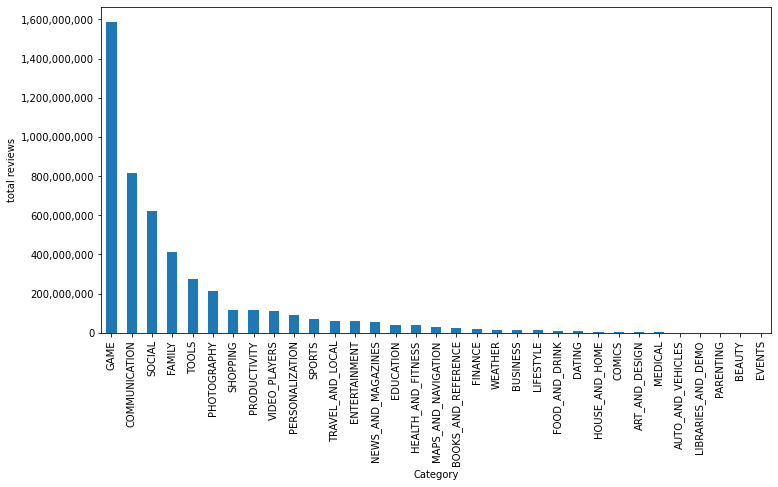

In [34]:
sum_of_reviews_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ylabel='total reviews')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

## Average price by category

In [35]:
price_by_category

Category
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.234675
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.180288
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.392755
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.317023
TRAVEL_AND_LOCAL       0.193605

## Barchart showing the mean price by category

<AxesSubplot:xlabel='Categories', ylabel='Average Price in dollars'>

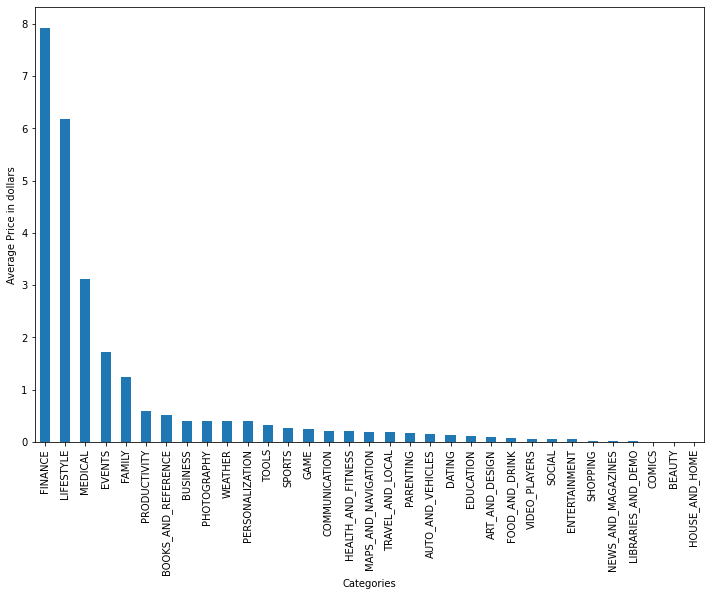

In [36]:
price_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), xlabel='Categories', ylabel='Average Price in dollars')

## Plot showing the mean price by category

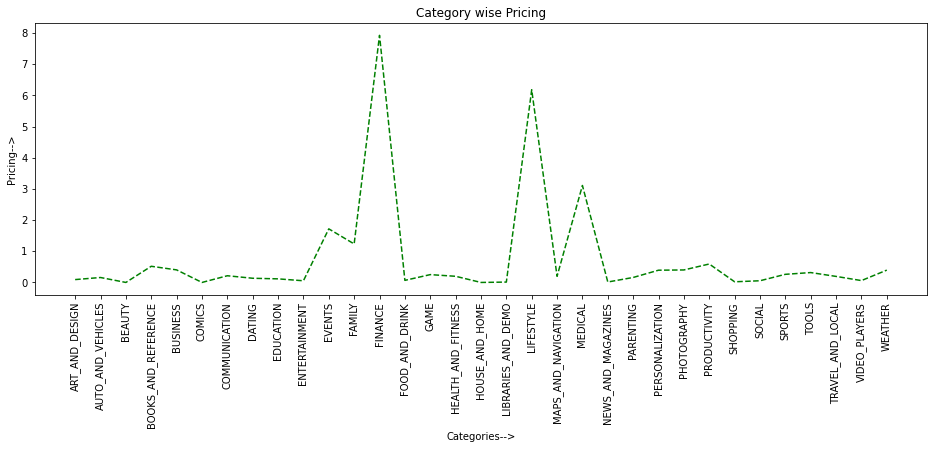

In [37]:
plt.figure(figsize=(16,5))
plt.plot(price_by_category, 'g--')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Pricing-->')
plt.show()

## Ratings by category

In [38]:
rating_by_category.sort_values(ascending=False)

Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
SOCIAL                 4.261017
WEATHER                4.248780
SPORTS                 4.236458
PRODUCTIVITY           4.226651
MEDICAL                4.216199
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.204564
PHOTOGRAPHY            4.197910
FOOD_AND_DRINK         4.185827
BUSINESS               4.182391
COMMUNICATION          4.180103
NEWS_AND_MAGAZINES     4.161837
COMICS                 4.160000
FINANCE                4.151639
TRAVEL_AND_LOCAL       4.132946
LIFESTYLE              4.131414
ENTERTAINMENT          4.126174
VIDEO_PLAYERS          4.084000
TOOLS                  4.080071

## Barchart showing the mean rating by category

<AxesSubplot:xlabel='Category'>

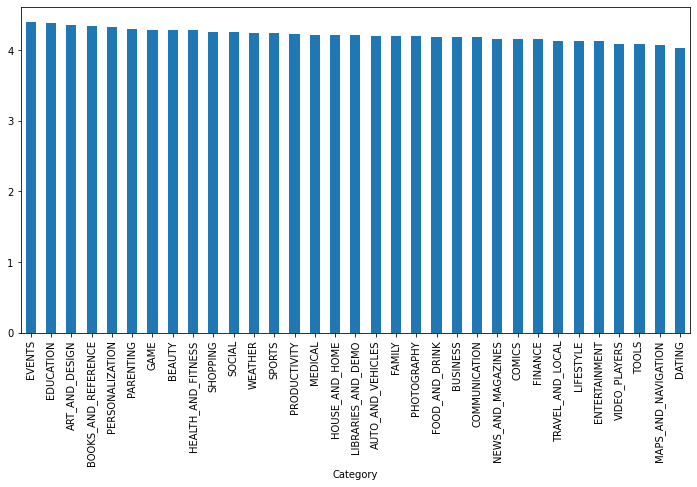

In [39]:
rating_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

## A plot of mean rating by category
#### This was necessary because the barchart visuals depict the values being too close to each other.
#### It is true that the values are near each other but the below visual helps to make the distinction in values clearer

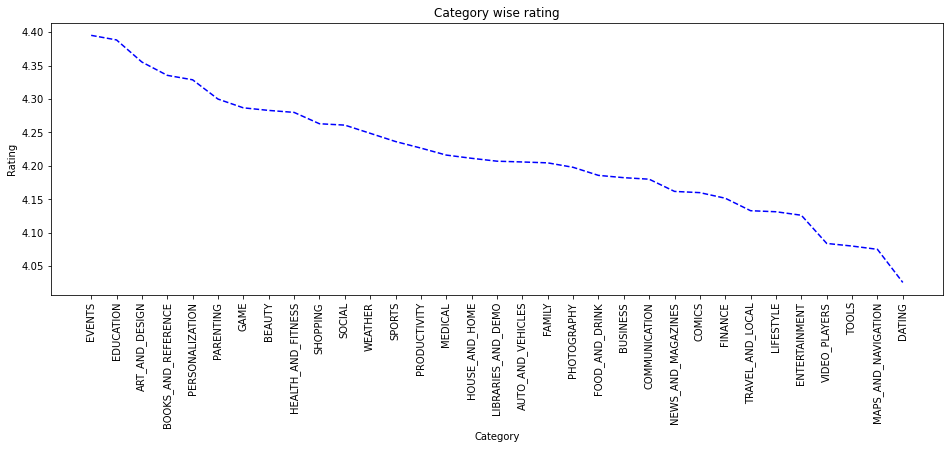

In [40]:

plt.figure(figsize=(16,5))
plt.plot(rating_by_category.sort_values(ascending=False), 'b--')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

## Mean reviews by category

In [41]:
reviews_by_category

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

## Barchart showing the average reviews by category

C:\Users\PC\AppData\Local\Temp/ipykernel_9604/4240646468.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '250,000'),
 Text(0, 500000.0, '500,000'),
 Text(0, 750000.0, '750,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1250000.0, '1,250,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 1750000.0, '1,750,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2250000.0, '2,250,000')]

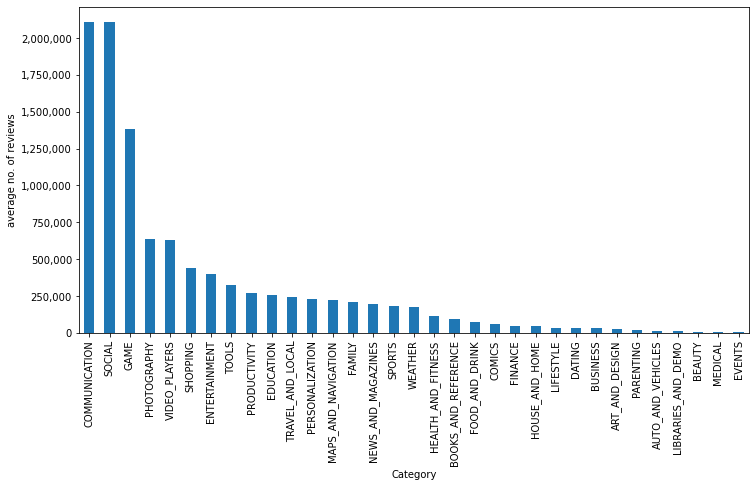

In [42]:
reviews_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ylabel='average no. of reviews')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

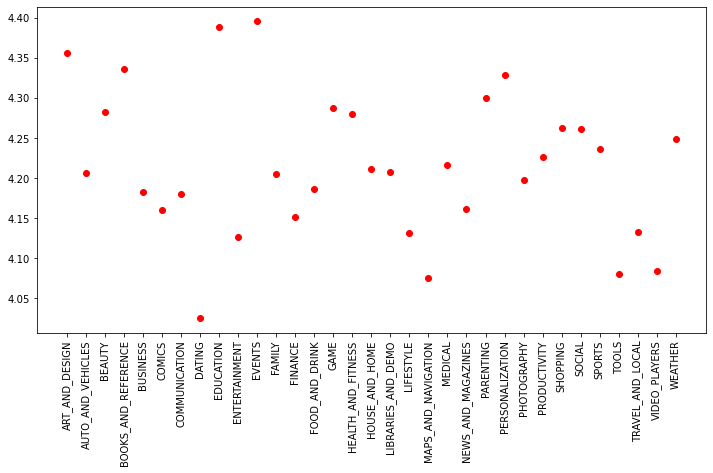

In [43]:
plt.figure(figsize=(12,6))
plt.plot(rating_by_category, 'ro')
plt.xticks(rotation = 90)
plt.show()

In [44]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Pie chart showing the percentage of free and paid apps in Googlestore

In [45]:
type_freq = df['Type'].value_counts()
type_freq

Free    10040
Paid      800
Name: Type, dtype: int64

<AxesSubplot:title={'center':'Percentage of Free and Paid apps in Googleappstore'}, ylabel='Type'>

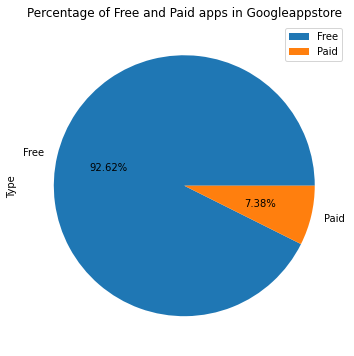

In [46]:
type_freq.plot(kind='pie', title="Percentage of Free and Paid apps in Googleappstore", legend=True, autopct='%1.2f%%', figsize=(6,6))

## Barchart showing the comparison between number of Free and Paid apps

<AxesSubplot:>

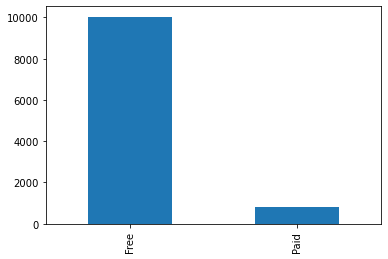

In [47]:
df['Type'].value_counts().plot(kind='bar')

In [48]:
df[df['Category'] == 'COMMUNICATION'].head(11)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17M,1.000000e+07,Free,0.0,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,Varies with device,1.000000e+08,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
343,My Tele2,COMMUNICATION,4.3,158679,8.8M,5.000000e+06,Free,0.0,Everyone,Communication,"August 3, 2018",2.4.1,4.4 and up
344,Firefox Browser fast & private,COMMUNICATION,4.4,3075028,Varies with device,1.000000e+08,Free,0.0,Everyone,Communication,"July 10, 2018",Varies with device,Varies with device


## Top ten most expensive apps in Google play store (using this dataset)

In [51]:
most_expensive_apps = df.sort_values(by='Price', ascending=False).head(20)
most_expensive_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40M,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up


## Number of apps in each category

<AxesSubplot:ylabel='total no. of apps'>

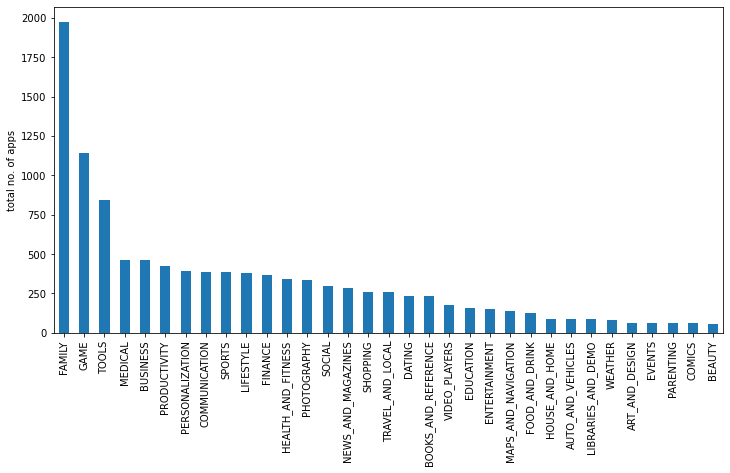

In [52]:
df['Category'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='total no. of apps')

## Which app has been installed the most by category?

C:\Users\PC\AppData\Local\Temp/ipykernel_9604/3457959336.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


[Text(0, 0.0, '0'),
 Text(0, 5000000000.0, '5,000,000,000'),
 Text(0, 10000000000.0, '10,000,000,000'),
 Text(0, 15000000000.0, '15,000,000,000'),
 Text(0, 20000000000.0, '20,000,000,000'),
 Text(0, 25000000000.0, '25,000,000,000'),
 Text(0, 30000000000.0, '30,000,000,000'),
 Text(0, 35000000000.0, '35,000,000,000'),
 Text(0, 40000000000.0, '40,000,000,000')]

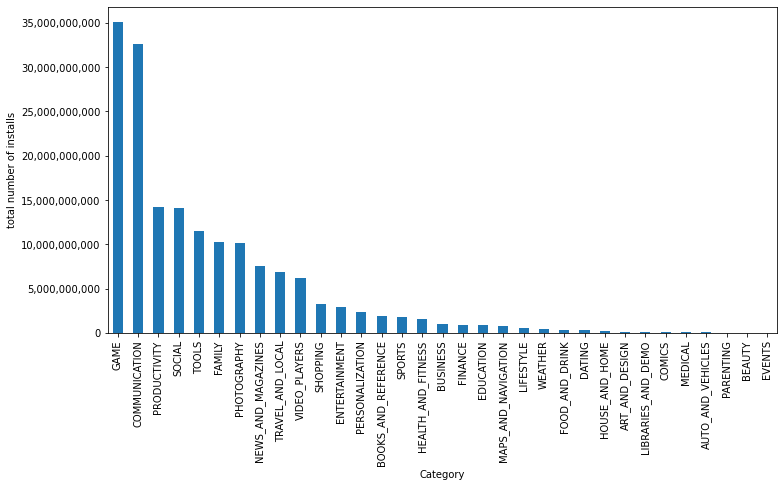

In [54]:
#grp = df.groupby('Category')
installs_by_category = grp['Installs'].agg(np.sum)
installs_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ylabel='total number of installs')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

In [55]:
installs_by_category.sort_values(ascending=False)

Category
GAME                   3.508602e+10
COMMUNICATION          3.264728e+10
PRODUCTIVITY           1.417609e+10
SOCIAL                 1.406987e+10
TOOLS                  1.145277e+10
FAMILY                 1.025826e+10
PHOTOGRAPHY            1.008825e+10
NEWS_AND_MAGAZINES     7.496318e+09
TRAVEL_AND_LOCAL       6.868887e+09
VIDEO_PLAYERS          6.222003e+09
SHOPPING               3.247849e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325495e+09
BOOKS_AND_REFERENCE    1.921470e+09
SPORTS                 1.751174e+09
HEALTH_AND_FITNESS     1.583073e+09
BUSINESS               1.001915e+09
FINANCE                8.766487e+08
EDUCATION              8.714520e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.376435e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.738988e+08
DATING                 2.643108e+08
HOUSE_AND_HOME         1.687125e+08
ART_AND_DESIGN         1.243381e+08
LIBRARIES_AND_DEMO     6.299591e+07
COMICS             

In [57]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_Installs_df

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


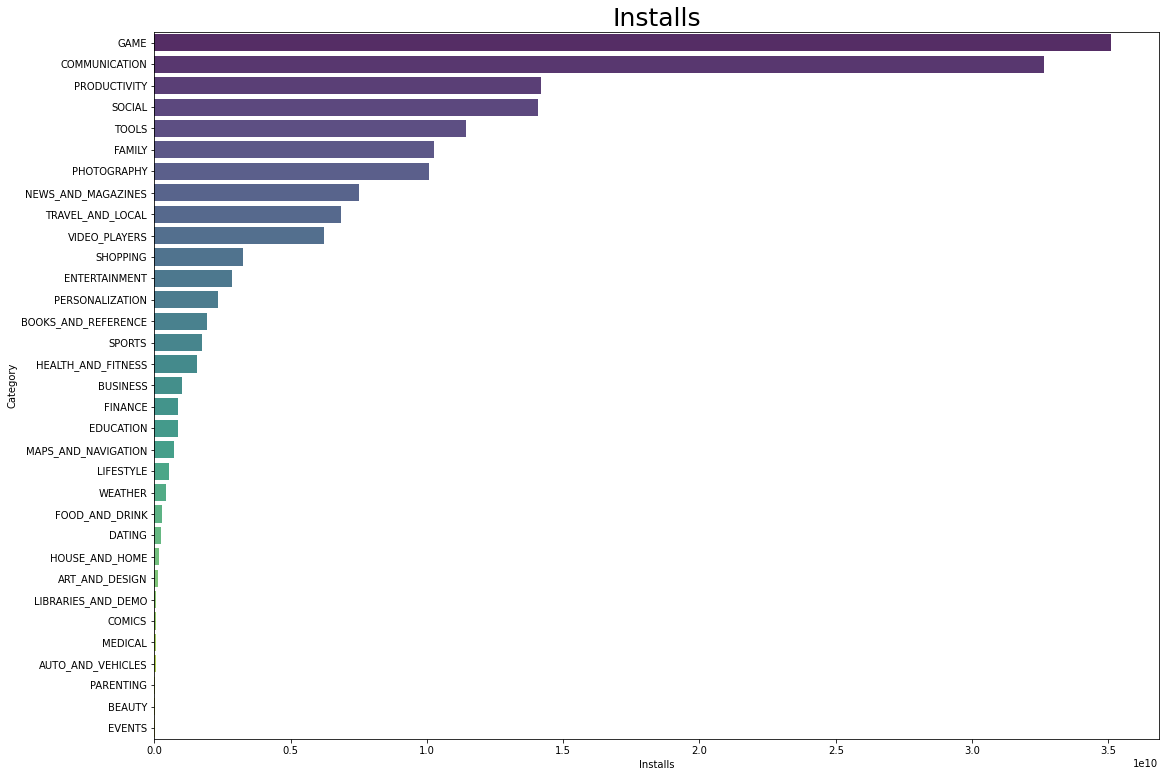

In [58]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [59]:
df_top_sports = df[df['Category'] == 'SPORTS'].sort_values(by="Installs", ascending=False).head(10)
grp1 = df_top_sports.groupby('App')
installs_by_app = grp1['Installs'].agg(np.sum)
installs_by_app.sort_values(ascending=False)
#.plot(kind='bar', figsize=(12,6))

App
3D Bowling                               100000000.0
8 Ball Pool                              100000000.0
Dream League Soccer 2018                 100000000.0
FIFA Soccer                              100000000.0
3D Tennis                                 50000000.0
Cricbuzz - Live Cricket Scores & News     50000000.0
EA SPORTS UFC®                            50000000.0
NBA LIVE Mobile Basketball                50000000.0
NFL                                       50000000.0
Top Eleven 2018 - Be a Soccer Manager     50000000.0
Name: Installs, dtype: float64

In [60]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Creating a new column - Earnings
### Earnings is gottten by multiplying the number of installs by the Price
### I noticed an app can be installed multiple times by the same user hence payment will not be done each time so this would impact the value of this result. This is a limitation I will like to explore further perhaps in another project

In [62]:
df['earnings'] = df['Installs'] * df['Price']
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,earnings
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.0
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.0


C:\Users\PC\AppData\Local\Temp/ipykernel_9604/1160472406.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


[Text(0, 0.0, '0'),
 Text(0, 25000000.0, '25,000,000'),
 Text(0, 50000000.0, '50,000,000'),
 Text(0, 75000000.0, '75,000,000'),
 Text(0, 100000000.0, '100,000,000'),
 Text(0, 125000000.0, '125,000,000'),
 Text(0, 150000000.0, '150,000,000'),
 Text(0, 175000000.0, '175,000,000'),
 Text(0, 200000000.0, '200,000,000')]

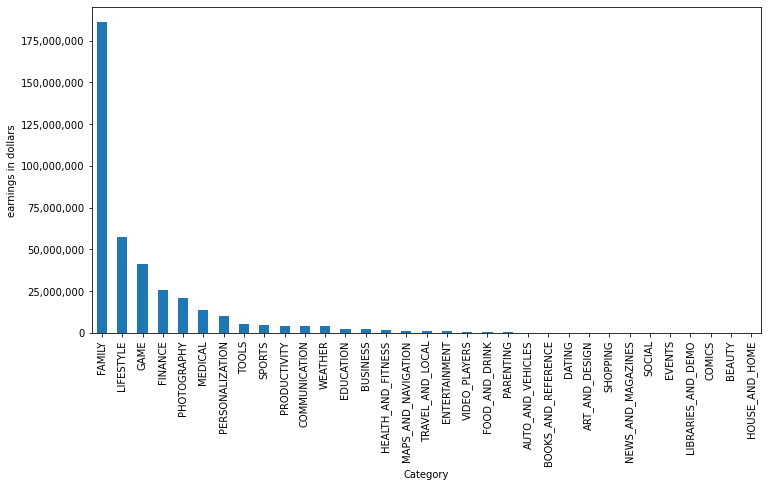

In [63]:
#grp = df.groupby('Category')
earnings_by_category = grp['earnings'].agg(np.sum)
earnings_by_category.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ylabel='earnings in dollars')


plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

## Correlation of Ratings, Reviews, Installs, Price and Earnings of all apps

In [64]:
corr_all = df.corr()

In [65]:
corr_all

,Rating,Reviews,Installs,Price,earnings
Rating,1.000000,0.063166,0.045496,-0.019318,0.009065
Reviews,0.063166,1.000000,0.643122,-0.009667,0.005094
Installs,0.045496,0.643122,1.000000,-0.011689,-0.004503
Price,-0.019318,-0.009667,-0.011689,1.000000,0.194457
earnings,0.009065,0.005094,-0.004503,0.194457,1.000000


<AxesSubplot:>

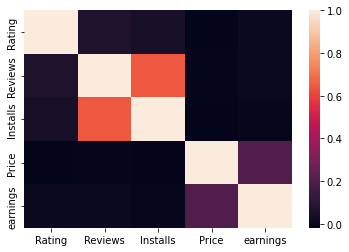

In [66]:
sns.heatmap(corr_all)

## Correlation of Ratings, Reviews, Installs, Price and Earnings of Paid apps

In [67]:
df_paid = df[df.Type == 'Paid']

In [68]:
corr_paid = df_paid.corr()

In [69]:
corr_paid

,Rating,Reviews,Installs,Price,earnings
Rating,1.000000,0.042153,0.056999,-0.104195,0.015943
Reviews,0.042153,1.000000,0.867504,-0.013860,0.902722
Installs,0.056999,0.867504,1.000000,-0.021633,0.784841
Price,-0.104195,-0.013860,-0.021633,1.000000,0.173032
earnings,0.015943,0.902722,0.784841,0.173032,1.000000


<AxesSubplot:>

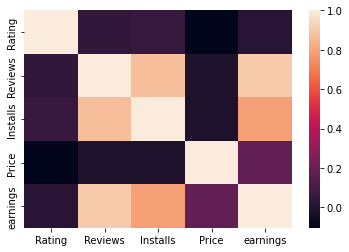

In [155]:
sns.heatmap(corr_paid)